In [1]:
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.DataFrame(pd.read_csv('data.csv'))

df

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False
...,...,...,...,...,...,...,...,...,...,...,...
995,Vocational,A,Female,Very Interested,Rural,49,7420000,63.6,85.99,True,True
996,Academic,B,Female,Less Interested,Rural,51,7480000,84.3,89.72,True,True
997,Vocational,A,Male,Less Interested,Urban,49,5550000,75.2,79.56,False,True
998,Academic,B,Male,Uncertain,Rural,53,5840000,105.8,87.18,True,True


In [3]:
df.isnull().sum()

type_school              0
school_accreditation     0
gender                   0
interest                 0
residence                0
parent_age               0
parent_salary            0
house_area               0
average_grades           0
parent_was_in_college    0
in_college               0
dtype: int64

In [4]:
df.dtypes

type_school               object
school_accreditation      object
gender                    object
interest                  object
residence                 object
parent_age                 int64
parent_salary              int64
house_area               float64
average_grades           float64
parent_was_in_college       bool
in_college                  bool
dtype: object

In [5]:
for i in ['parent_was_in_college']:
    df[i] = df[i].map({True:1,False:0})

In [6]:
df.dtypes

type_school               object
school_accreditation      object
gender                    object
interest                  object
residence                 object
parent_age                 int64
parent_salary              int64
house_area               float64
average_grades           float64
parent_was_in_college      int64
in_college                  bool
dtype: object

In [7]:
test=df[df.interest=='Not Interested']
test2 = test[test.in_college == True]

drop1 = list(test2.index)

In [8]:
test = df[df.interest == 'Very Interested']
test2 = test[test.in_college == False]

drop2 = list(test2.index)

In [9]:
drop3=list(df[(df.parent_salary<4360000) & (df.house_area>74.5)].index)

In [10]:
drop_rows = drop1+drop2+drop3
len(drop_rows)

drop_row = list(set(drop_rows))
len(drop_row)

256

In [11]:
df = df.drop(drop_row,axis=0)

In [12]:
i_dict={}
for i in dict(df.dtypes):
    if dict(df.dtypes)[i] == 'object':
        i_dict[i]=dict(df[i].value_counts())
        
print(i_dict)

{'type_school': {'Academic': 448, 'Vocational': 296}, 'school_accreditation': {'B': 378, 'A': 366}, 'gender': {'Male': 373, 'Female': 371}, 'interest': {'Uncertain': 228, 'Less Interested': 207, 'Very Interested': 183, 'Quiet Interested': 97, 'Not Interested': 29}, 'residence': {'Urban': 416, 'Rural': 328}}


In [13]:
dummies = {}
for i in i_dict:
    dummies[i] = pd.get_dummies(df[i],drop_first=True)

In [14]:
if 4 in drop_row:
    print('yes')

yes


In [15]:
df.shape

(744, 11)

In [16]:
df1 = df.drop(list(i_dict.keys()),axis=1)

df1.head()

,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college
0,56,6950000,83.0,84.09,0,True
1,57,4410000,76.8,86.91,0,True
2,50,6500000,80.6,87.43,0,True
3,49,6600000,78.2,82.12,1,True
5,48,3770000,65.3,86.79,1,False


In [17]:
DataFrames = dummies.values()

In [18]:
df2 = pd.concat([dummies[i] for i in dummies],axis=1)

In [19]:
df2.head()

,Vocational,B,Male,Not Interested,Quiet Interested,Uncertain,Very Interested,Urban
0,0,0,1,0,0,0,0,1
1,0,0,1,0,0,0,0,1
2,0,1,0,0,0,0,1,1
3,1,1,1,0,0,0,1,0
5,1,1,0,0,0,0,0,0


In [20]:
df3 = pd.concat([df1,df2],axis = 1)

df3

,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college,Vocational,B,Male,Not Interested,Quiet Interested,Uncertain,Very Interested,Urban
0,56,6950000,83.0,84.09,0,True,0,0,1,0,0,0,0,1
1,57,4410000,76.8,86.91,0,True,0,0,1,0,0,0,0,1
2,50,6500000,80.6,87.43,0,True,0,1,0,0,0,0,1,1
3,49,6600000,78.2,82.12,1,True,1,1,1,0,0,0,1,0
5,48,3770000,65.3,86.79,1,False,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,49,7420000,63.6,85.99,1,True,1,0,0,0,0,0,1,0
996,51,7480000,84.3,89.72,1,True,0,1,0,0,0,0,0,0
997,49,5550000,75.2,79.56,0,True,1,0,1,0,0,0,0,1
998,53,5840000,105.8,87.18,1,True,0,1,1,0,0,1,0,0


In [21]:
p_in_clg_dummies = pd.get_dummies(df3.parent_was_in_college,drop_first=True)

In [22]:
df4 = pd.concat([df3.drop(['parent_was_in_college'],axis=1),p_in_clg_dummies],axis=1)

In [23]:
df4

,parent_age,parent_salary,house_area,average_grades,in_college,Vocational,B,Male,Not Interested,Quiet Interested,Uncertain,Very Interested,Urban,1
0,56,6950000,83.0,84.09,True,0,0,1,0,0,0,0,1,0
1,57,4410000,76.8,86.91,True,0,0,1,0,0,0,0,1,0
2,50,6500000,80.6,87.43,True,0,1,0,0,0,0,1,1,0
3,49,6600000,78.2,82.12,True,1,1,1,0,0,0,1,0,1
5,48,3770000,65.3,86.79,False,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,49,7420000,63.6,85.99,True,1,0,0,0,0,0,1,0,1
996,51,7480000,84.3,89.72,True,0,1,0,0,0,0,0,0,1
997,49,5550000,75.2,79.56,True,1,0,1,0,0,0,0,1,0
998,53,5840000,105.8,87.18,True,0,1,1,0,0,1,0,0,1


In [24]:
X = df4.drop(['in_college'],axis=1)
y = df4.in_college

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [48]:
pd.Series(y).value_counts()

1    424
0    320
dtype: int64

In [37]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=12)

In [38]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

In [49]:
from sklearn.model_selection import GridSearchCV

parameters={'penalty':['l2','elasticnet'],'C':[0.1,0.5,1,2,3,4,5,6,10,20,30,40,50],'max_iter':[50,100,150,200]}

classifier_regressor = GridSearchCV(classifier,param_grid=parameters,scoring='accuracy',cv=5)

In [50]:
classifier_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [50, 100, 150, 200],
                         'penalty': ['l2', 'elasticnet']},
             scoring='accuracy')

In [51]:
classifier_regressor.best_params_

{'C': 0.1, 'max_iter': 50, 'penalty': 'l2'}

In [42]:
classifier_regressor.best_score_

0.5478991596638656

In [43]:
y_pred=classifier_regressor.predict(X_test)

from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_pred,y_test)
print(score)

0.6577181208053692


In [44]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)

cm

array([[ 0, 51],
       [ 0, 98]], dtype=int64)

In [33]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

       False       0.00      0.00      0.00         0
        True       1.00      0.66      0.79       149

    accuracy                           0.66       149
   macro avg       0.50      0.33      0.40       149
weighted avg       1.00      0.66      0.79       149



<AxesSubplot:>

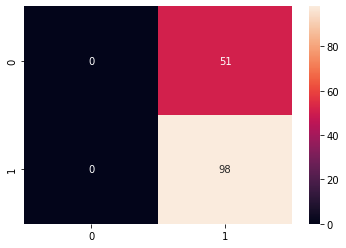

In [34]:
sns.heatmap(cm,annot=True)

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [53]:
y_pred_rf=rf.predict(X_test)

from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_pred_rf,y_test)
print(score)

0.9060402684563759


In [55]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred_rf)
cm

array([[48,  3],
       [11, 87]], dtype=int64)

In [56]:
print(classification_report(y_pred_rf,y_test))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87        59
           1       0.89      0.97      0.93        90

    accuracy                           0.91       149
   macro avg       0.91      0.89      0.90       149
weighted avg       0.91      0.91      0.90       149



<AxesSubplot:>

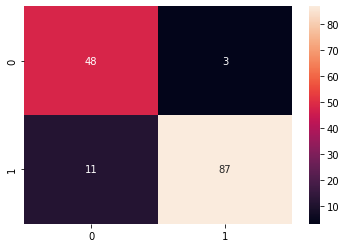

In [57]:
sns.heatmap(cm,annot=True)